<a href="https://colab.research.google.com/github/paolopdel/DogBreed/blob/master/dog_app_paolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-04-25 07:31:40--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.248
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.7MB/s    in 53s     

2020-04-25 07:32:34 (20.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [0]:
!unzip dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03435.jpg  
  inflating: dogImages/train/048.Chihua

In [0]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2020-04-25 07:33:08--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.152
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  21.3MB/s    in 10s     

2020-04-25 07:33:19 (18.6 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [0]:
!unzip lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/Stella_Tennant/
  inflating: lfw/Stella_Tenn

In [0]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


##<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [0]:
pip install opencv-python

Number of faces detected: 1


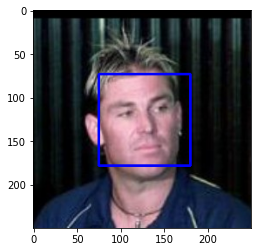

In [0]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
percentage of the first 100 images in human_files=    99 %
percentage of the first 100 images in human_files=    6 %

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
## la funzione sopra face_detector(img_path) restituisce vero se un volto è stato tracciato, falso se invece non lo è
## usare la funzione sopra sulle immagini dei volti umani e dei cani per contare quante immzagini vengono tracciate

print(human_files_short[0])
human_files_Count_True=0
dog_files_Count_True=0

for i in range(99):
    print(i,face_detector(human_files_short[i]))
    if face_detector(human_files_short[i]) == True:
            human_files_Count_True += 1
    print("human_files_Count_True=   " , human_files_Count_True)  
        
for i in range(99):
    print(i,face_detector(dog_files_short[i]))
    if face_detector(dog_files_short[i]) == True:
            dog_files_Count_True += 1
    print("dog_files_Count_True=   " , dog_files_Count_True)
human_files_Count_True=human_files_Count_True+1
dog_files_Count_True=dog_files_Count_True+1

print("percentage of the first 100 images in human_files=   ", human_files_Count_True,"%") 
print("percentage of the first 100 images in dog_files=   ", dog_files_Count_True,"%")     




lfw/Shane_Warne/Shane_Warne_0002.jpg
0 True
human_files_Count_True=    1
1 True
human_files_Count_True=    2
2 True
human_files_Count_True=    3
3 True
human_files_Count_True=    4
4 True
human_files_Count_True=    5
5 True
human_files_Count_True=    6
6 True
human_files_Count_True=    7
7 True
human_files_Count_True=    8
8 True
human_files_Count_True=    9
9 True
human_files_Count_True=    10
10 True
human_files_Count_True=    11
11 True
human_files_Count_True=    12
12 True
human_files_Count_True=    13
13 True
human_files_Count_True=    14
14 True
human_files_Count_True=    15
15 True
human_files_Count_True=    16
16 True
human_files_Count_True=    17
17 True
human_files_Count_True=    18
18 True
human_files_Count_True=    19
19 True
human_files_Count_True=    20
20 True
human_files_Count_True=    21
21 True
human_files_Count_True=    22
22 True
human_files_Count_True=    23
23 True
human_files_Count_True=    24
24 True
human_files_Count_True=    25
25 True
human_files_Count_True= 

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    
    
  
    
    
    image = Image.open(img_path).convert('RGB')

    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(image)[:,:,:].unsqueeze(0)
    
    if torch.cuda.is_available():
            image_tensor = image_tensor.cuda()

    output = VGG16(image_tensor)
    
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    return int(pred) # predicted class index
        
    


In [0]:
img_path = "dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg"
VGG16_predict(img_path)

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    output = VGG16_predict(img_path)
    
    if (150 < output) and (output < 269):
        result = True
    else:
        result = False
    
    return result  # true/false
    
   

In [0]:
img_path = "dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg"
dog_detector(img_path)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?
percentage of the first 100 images in human_files=    0 %
percentage of the first 100 images in human_files=    100 %

__Answer:__ 


In [0]:
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


human_files_Count_True=0
dog_files_Count_True=0

for i in range(100):
    print(i,dog_detector(human_files_short[i]))
    if dog_detector(human_files_short[i]) == True:
            human_files_Count_True += 1
    print("human_files_Count_True=   " , human_files_Count_True)  
        
for i in range(100):
    print(i,dog_detector(dog_files_short[i]))
    if dog_detector(dog_files_short[i]) == True:
            dog_files_Count_True += 1
    print("dog_files_Count_True=   " , dog_files_Count_True)


print("percentage of the first 100 images in human_files=   ", human_files_Count_True,"%") 
print("percentage of the first 100 images in dog_files=   ", dog_files_Count_True,"%")  

0 False
human_files_Count_True=    0
1 False
human_files_Count_True=    0
2 False
human_files_Count_True=    0
3 False
human_files_Count_True=    0
4 False
human_files_Count_True=    0
5 False
human_files_Count_True=    0
6 False
human_files_Count_True=    0
7 False
human_files_Count_True=    0
8 False
human_files_Count_True=    0
9 False
human_files_Count_True=    0
10 False
human_files_Count_True=    0
11 False
human_files_Count_True=    0
12 False
human_files_Count_True=    0
13 False
human_files_Count_True=    0
14 False
human_files_Count_True=    0
15 False
human_files_Count_True=    0
16 False
human_files_Count_True=    0
17 False
human_files_Count_True=    0
18 False
human_files_Count_True=    0
19 False
human_files_Count_True=    0
20 False
human_files_Count_True=    0
21 False
human_files_Count_True=    0
22 False
human_files_Count_True=    0
23 False
human_files_Count_True=    0
24 False
human_files_Count_True=    0
25 False
human_files_Count_True=    0
26 False
human_files_C

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.RandomRotation(53),
                                       transforms.CenterCrop((224,224)),
                                       transforms.ToTensor(),
                                       #transforms.Normalize([0.5, 0.5, 0.5],
                                                            #[0.5, 0.5, 0.5])])
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.RandomRotation(53),
                                       #transforms.RandomRotation(60),
                                       #transforms.RandomRotation(80),
                                       #transforms.Resize(256),
                                       transforms.CenterCrop((224,224)),
                                       transforms.ToTensor(),
                                       #transforms.Normalize([0.5, 0.5, 0.5],
                                                           #[0.5, 0.5, 0.5])])
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.RandomRotation(53),
                                      transforms.CenterCrop((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.5, 0.5, 0.5],
                                                           #[0.5, 0.5, 0.5])])
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data=datasets.ImageFolder("dogImages/train",transform=train_transforms)
valid_data=datasets.ImageFolder("dogImages/valid",transform=valid_transforms)
test_data=datasets.ImageFolder("dogImages/test",transform=test_transforms)




loaders = {
    'train' : torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True),
    'valid' : torch.utils.data.DataLoader(valid_data, batch_size=20, shuffle=True),
    'test' : torch.utils.data.DataLoader(test_data, batch_size=20, shuffle=True)    
}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  transforms.RandomRotation (30) rotates the image 30 degrees,
the transforms.CenterCrop ((224,224)), cuts the image in the central part size (224,224),
the transforms.Normalize ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])] scales the image data to facilitate subsequent calculation operations.

the size of the tensor is (3 x H x L), because the pre-trained models provide 3-channel RGB images (3 x H x L), where H and W should be at least 224.

Have you decided to increase the data set? If so, how (through translations, throws, rotations, etc.)? If not, why not?
I decided to increase the data set with rotations and cropping, to check if the model will be able to predict even those images.



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F


    
  # defining the CNN architecture
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3,padding=1) 
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1) 
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1) 
        self.conv4 = nn.Conv2d(64, 128,3,padding=1) 
        
       
        
        self.pool = nn.MaxPool2d(2, 2)
   
       
        self.dropout = nn.Dropout(0.25)
       
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)
       
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
       
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
       
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
                

        return x
        #-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I decide how to apply 3x3 filters on 224x224 3-channel images:

x = F.relu (self.conv1 (x)): I apply the filters to have 16 channels
x = self.pool (x): I reduce the images from 224 to 112

x = F.relu (self.conv2(x)): I apply the filters to have 32 channels
x = self.pool (x): I reduce the images from 112 to 56

x = F.relu (self.conv3 (x)): I apply the filters to have 64 channels
x = self.pool (x): I reduce the images from 56 to 28

x = F.relu (self.conv4 (x)): I apply the filters to have 128 channels
x = self.pool (x): I reduce the images from 28 to 14

x = self.pool (x): I reduce the images from 14 to 7 the channels remain 128

In the end I will have an image: 7x7x128

in the various steps the ReLu function is always used.

The increase in channels allows me to have more images with important details (horizontal, vertical, oblique lines, ...) that will serve to recognize the differences between the dog breeds.

Decreasing images reduces memory to facilitate calculations. self.pool = nn.MaxPool2d (2, 2) reduces the images by half.
self.dropout = nn.Dropout (0.25) deactivates the nodes by 1/4 to facilitate calculations and avoid overfitting problems.

To recognize dog breeds, the model needs many filters in order to break down the images into many basic features. But I don't have to overdo the number of channels because if I don't have enough train / valid photos the gradient doesn't change anymore and the loss doesn't go down.

From my experience I have seen that with the train and valid photos available and 7x7x128 images bring the loss from 4.8 initial to 4.38 which in the tests gave me 11%.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
#criterion_scratch =  nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, data, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    #valid_loss_min = np.Inf
    valid_loss_min = np.Inf # track change in validation loss 
    n_epochs = 30
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            data.requires_grad=True
            target.requires_grad=False
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = (train_loss) + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
           
            
         
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        #valid_loss_min=5.000
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            ))
        #print(output)

              ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
              valid_loss_min,
              valid_loss))
              torch.save(model.state_dict(), 'model_scratch.pth')
              valid_loss_min = valid_loss

              
            
    # return trained model
    return model



model_scratch = train(20, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pth')





Epoch: 1 	Training Loss: 4.887030 	Validation Loss: 4.877809
Validation loss decreased (inf --> 4.877809).  Saving model ...
Epoch: 2 	Training Loss: 4.860751 	Validation Loss: 4.840732
Validation loss decreased (4.877809 --> 4.840732).  Saving model ...
Epoch: 3 	Training Loss: 4.811145 	Validation Loss: 4.808127
Validation loss decreased (4.840732 --> 4.808127).  Saving model ...
Epoch: 4 	Training Loss: 4.762368 	Validation Loss: 4.788900
Validation loss decreased (4.808127 --> 4.788900).  Saving model ...
Epoch: 5 	Training Loss: 4.707623 	Validation Loss: 4.714424
Validation loss decreased (4.788900 --> 4.714424).  Saving model ...
Epoch: 6 	Training Loss: 4.608529 	Validation Loss: 4.621044
Validation loss decreased (4.714424 --> 4.621044).  Saving model ...
Epoch: 7 	Training Loss: 4.532427 	Validation Loss: 4.587490
Validation loss decreased (4.621044 --> 4.587490).  Saving model ...
Epoch: 8 	Training Loss: 4.490820 	Validation Loss: 4.552478
Validation loss decreased (4.58749

In [0]:
model_scratch.load_state_dict(torch.load('model_scratch.pth'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):
#def test(model, criterion):


    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # calculate the loss
        loss = criterion(output, target)
        
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        #print(pred)
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    

test(loaders, model_scratch, criterion_scratch, use_cuda)





Test Loss: 4.108088


Test Accuracy: 11% (92/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.RandomRotation(53),
                                       transforms.CenterCrop((224,224)),
                                       transforms.ToTensor(),
                                       #transforms.Normalize([0.5, 0.5, 0.5],
                                                            #[0.5, 0.5, 0.5])])
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.RandomRotation(53),
                                       #transforms.RandomRotation(60),
                                       #transforms.RandomRotation(80),
                                       #transforms.Resize(256),
                                       transforms.CenterCrop((224,224)),
                                       transforms.ToTensor(),
                                       #transforms.Normalize([0.5, 0.5, 0.5],
                                                           #[0.5, 0.5, 0.5])])
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.RandomRotation(53),
                                      transforms.CenterCrop((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.5, 0.5, 0.5],
                                                           #[0.5, 0.5, 0.5])])
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data=datasets.ImageFolder("dogImages/train",transform=train_transforms)
valid_data=datasets.ImageFolder("dogImages/valid",transform=valid_transforms)
test_data=datasets.ImageFolder("dogImages/test",transform=test_transforms)




loaders = {
    'train' : torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True),
    'valid' : torch.utils.data.DataLoader(valid_data, batch_size=20, shuffle=True),
    'test' : torch.utils.data.DataLoader(test_data, batch_size=20, shuffle=True)    
}


In [0]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    vgg16 = vgg16.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.vgg16(pretrained=True)
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False


n_inputs = vgg16.classifier[6].in_features

# add last linear layer (n_inputs -> 133)
# new layers automatically have requires_grad = True
#last_layer = nn.Linear(n_inputs, len(classes))
last_layer = nn.Linear(n_inputs, 133)

vgg16.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if use_cuda:
    vgg16.cuda()

# check to see that your last layer produces the expected number of outputs
#print(vgg16.classifier[6].out_features)
#print(vgg16)   


#if use_cuda:
    #model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
model_transfer = models.vgg16 (pretrained = True): ----> the model that
I will use uses the vgg16 model.

for param in vgg16.features.parameters ():
     param.requires_grad = False ----> the weights of the vgg16 model are reset to make new calculations.

n_inputs = vgg16.classifier [6] .in_features
last_layer = nn.Linear (n_inputs, 133)
vgg16.classifier [6] = last_layer -----> to use vgg16 in my model you have to make these changes:

n_inputs corresponds to the number of data entering the vgg16 model in point 6 in general.
I create a connection between this input n_inputs and the output of 133 which is the number of races that my model will have to predict (last_layer = nn.Linear (n_inputs, 133)).
In the end the vgg16 model will use this connection of mine (vgg16.classifier [6] = last_layer).


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion_transfer = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
# train the model

def train(loaders, model, criterion, use_cuda,save_path):

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
   valid_loss_min = np.Inf # track change in validation loss

# number of epochs to train the model
   n_epochs = 5

   for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
    ###################
    # train the model #
    ###################
        model.train()
    
        for batch_idx, (data, target) in enumerate(loaders['train']):
        # move tensors to GPU if CUDA is available
            if use_cuda:
              data, target = data.cuda(), target.cuda()
              # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = vgg16(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss 
            #train_loss += loss.item()
            train_loss = (train_loss) + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
    ###################
    # valid the model #
    ###################     
        model.eval()
        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            #forward pass: compute predicted outputs by passing inputs to the model
            output = vgg16(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
          


        
            

            ## TODO: save the model if validation loss has decreased
        if batch_idx % 20 == 19:    # print training loss every specified number of mini-batches
                print('Epoch %d, Batch %d loss: %.16f' %
                        (epoch, batch_idx + 1, train_loss / 20))
                train_loss = 0.0
        if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
              valid_loss_min,
              valid_loss))
              torch.save(model.state_dict(), 'model_transfer.pth')
              valid_loss_min = valid_loss

             
   return model

model_transfer = train(loaders, model_transfer, criterion_transfer, use_cuda, 'model_transfer.pth')




Validation loss decreased (inf --> 3.730383).  Saving model ...
Validation loss decreased (3.730383 --> 2.587216).  Saving model ...
Validation loss decreased (2.587216 --> 2.047304).  Saving model ...
Validation loss decreased (2.047304 --> 1.826009).  Saving model ...
Validation loss decreased (1.826009 --> 1.702067).  Saving model ...


In [0]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
model_transfer.load_state_dict(torch.load('model_transfer.pth'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
def test(loaders, model, criterion, use_cuda):
#def test(model, criterion):


    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    

    vgg16.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output =vgg16(data)
        #print(output)
        # calculate the loss
        loss = criterion(output, target)
        #print(loss)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        #print(test_loss)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        #print(pred)
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
# call test function    
##test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)
test(loaders, model_transfer, criterion_transfer, use_cuda)

#test(model_scratch,criterion_scratch)


Test Loss: 1.430625


Test Accuracy: 63% (528/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
import os
from torchvision import datasets



data_transfer = {'train': 
 datasets.ImageFolder('dogImages/train',transform=transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor()]))}

class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):

    image = Image.open(img_path)

    # large images will slow down processing


    in_transform = transforms.Compose([
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)

  

    if torch.cuda.is_available():
          image = image.cuda()

    #output = model_transfer(image)
    output=vgg16(image)
    pred = torch.argmax(output)

    return class_names[pred],pred.item()

    

In [0]:
predict_breed_transfer('dogImages/train/054.Collie/Collie_03789.jpg')

'Collie'

In [0]:
Image.open('/content/IMG_20200423_221409.jpg')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def run_app(img_path):
  if face_detector(img_path) == True:
    print("human")
  if dog_detector(img_path) == True:
    print("dog, breed:"+str(predict_breed_transfer(img_path)))
  if face_detector(img_path) == False and dog_detector(img_path) == False:
    print("Error: neither")
    return



---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is very good. I see correspondence between the breeds of dogs and the proposed images. Above all in the colors and in some main features.

To improve the model, in my opinion, you need to increase the number of photo training and validation. 

Naturally use the vgg16 model since I got 60% compared to 11%. 

Train the network by adding epoch trying to avoid overfitting, that is, the point where the valid_loss does not decrease while the train_loss continues to decrease.

In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)



    #for file in np.hstack((human_files[:3], dog_files[:3])):
    #print(run_app(file))

# 1 human, dog, neither human nor dog    
#print(run_app('alia.jpg'))
#print(run_app('dog.jpg'))
#print(run_app('apple.jpg'))

# load filenames for human and dog images
#human_files = np.array(glob("lfw/*/*"))
#dog_files = np.array(glob("dogImages/*/*/*"))

#American staffordshire terrier
#Great dane
#Chinese shar-pei
#Boston terrier
#Boston terrier
#Boston terrier
#Greyhound
#Canaan dog
#Error

human
human
human
dog, breed:('English springer spaniel', 62)
dog, breed:('English springer spaniel', 62)
dog, breed:('English springer spaniel', 62)


In [0]:
!wget https://paolo27.s3.eu-west-3.amazonaws.com/my_photos.zip

In [0]:
!unzip my_photos.zip

In [0]:
cat_images = np.array(glob("my_photos/*/*"))
dog_images = np.array(glob("my_photos/*/*"))
everything_images = np.array(glob("my_photos/*/*"))
human_images = np.array(glob("my_photos/*/*"))
## suggested code, below
for my_images in np.hstack((cat_images)):
    print(my_images)
    run_app(my_images)



my_photos/cat/cat01.jpg
Error: neither
my_photos/cat/cat02.jpg
Error: neither
my_photos/cat/cat03.jpg
Error: neither
my_photos/everything/moon.jpg
Error: neither
my_photos/everything/pooh.jpg
Error: neither
my_photos/everything/bird.jpg
Error: neither
my_photos/everything/tree.jpg
Error: neither
my_photos/human/human01.jpg
human
my_photos/human/human03.jpg
human
my_photos/human/human02.jpg
human
my_photos/dog/dog01.jpg
dog, breed:('Golden retriever', 75)
my_photos/dog/dog03.jpg
dog, breed:('American eskimo dog', 5)
my_photos/dog/dog02.jpg
dog, breed:('Labrador retriever', 95)


In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def run_app2(img_path):
  if face_detector(img_path) == True:
    dog_detector(img_path) == True
    print("dog, breed:"+str(predict_breed_transfer(img_path)))
    
  if dog_detector(img_path) == True:
    print("dog, breed:"+str(predict_breed_transfer(img_path)))
   
  if face_detector(img_path) == False and dog_detector(img_path) == False:
    dog_detector(img_path) == True
    print("dog, breed:"+str(predict_breed_transfer(img_path)))
   
    
    return


In [0]:
cat_images = np.array(glob("my_photos/*/*"))
dog_images = np.array(glob("my_photos/*/*"))
everything_images = np.array(glob("my_photos/*/*"))
human_images = np.array(glob("my_photos/*/*"))
## suggested code, below
for my_images in np.hstack((cat_images)):
    print(my_images)
    
    run_app2(my_images)
   

my_photos/cat/cat01.jpg
dog, breed:('Norwegian lundehund', 109)
my_photos/cat/cat02.jpg
dog, breed:('French bulldog', 68)
my_photos/cat/cat03.jpg
dog, breed:('Australian cattle dog', 10)
my_photos/everything/moon.jpg
dog, breed:('Bedlington terrier', 18)
my_photos/everything/pooh.jpg
dog, breed:('Maltese', 100)
my_photos/everything/bird.jpg
dog, breed:('Brussels griffon', 37)
my_photos/everything/tree.jpg
dog, breed:('Afghan hound', 1)
my_photos/human/human01.jpg
dog, breed:('Afghan hound', 1)
my_photos/human/human03.jpg
dog, breed:('Nova scotia duck tolling retriever', 111)
my_photos/human/human02.jpg
dog, breed:('Beagle', 15)
my_photos/dog/dog01.jpg
dog, breed:('Golden retriever', 75)
my_photos/dog/dog03.jpg
dog, breed:('American eskimo dog', 5)
my_photos/dog/dog02.jpg
dog, breed:('Labrador retriever', 95)


my_photos/human/human02.jpg


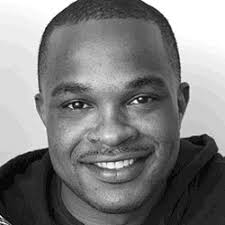

In [0]:
# I see the image I have chosen(0=cat01, 1=cat02,..., 12=dog02)
# in this case human02.jpg is 9
print(np.hstack((cat_images))[9])
Image.open(np.hstack((cat_images))[9])


dogImages/train/016.Beagle/Beagle_01125.jpg


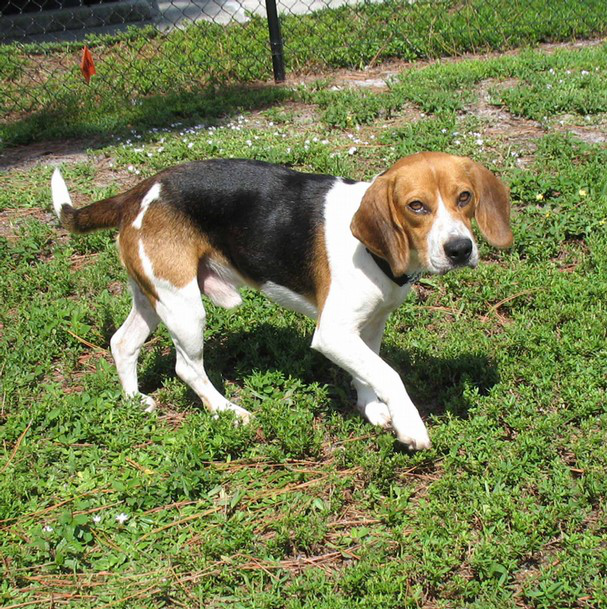

In [0]:
#here I see the breed of dog that the program has calculated to associate.
#in this case human02.jpg is 9 and the model has associated the image with breed 15

dog_breed = np.array(glob(breed_folder[15]+ "/*"))
breed_folder.sort()
print(dog_breed [1])
Image.open(dog_breed [1])